# Kaggle - Titanic dataframe.
### Goal - Predict who lives

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.


In [1]:
# Analysis
import numpy as np
import pandas as pd
import random as rnd

# Visualisation
import seaborn as sns
import matplotlib as plt
%matplotlib inline

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### Aquiring Data
Datasets can be found on the <a href="https://www.kaggle.com/c/titanic/data">Kaggle data page here</a>

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
#Combing data so desired changes can be applied to both
combine = [train_df, test_df]

### Analyising Data

Information of data can be found on the <a href="https://www.kaggle.com/c/titanic/data">Kaggle data page here</a>

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


Identifying data types for later visualisation.

##### Categorical
* Survived
* Pclass
* Sex
* Embarked

##### Continous
* Age
* SibSp
* Parch
* Fare

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Mixed data types
* The Ticket variable contains both numerical and aplhanumerical observations.
* The Cabin variable contains only alphanumerical obersvations (as well as an insane amount on NaN values).

In [5]:
train_df.info()
print('-'*39)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
---------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerI

#### Current insights
* Total training samples are 891 or 40% of the 2224
* Sample shows a survival rate of 38% compared to the actual 32%
* Around 70% of passengers had neither sibling and/or spouse, despite the 52% average
* Most people (> 75%) did not travel with parents or children
* Very few (< 1%) passengers were between 65 and 80 of age.
* Fare seems to vary considerably, likely, the mean is skewed due to the outlier (512).

In [6]:
train_df.describe()
#https://www.kaggle.com/startupsci/titanic-data-science-solutions <- States that some information should be stored here. 
#I don't know the informations function so I've left it out.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Distribution of categorical features
* Names are unique across the dataset
* Majority of passengers were male (freq=577 / count=891  = 65% )
* Majority of passengers embarked from S (freq=644 / count=889 = 72%)
* Only 72% of Cabin observations were unique (28% duplicates)
* Only 76% of Ticket observations were unique (24% duplicates)

In [7]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",male,347082,B96 B98,S
freq,1,577,7,4,644


**Direct Copy. Original found <a href="https://www.kaggle.com/startupsci/titanic-data-science-solutions"><b>her</b></a>**

###### Correlating.

We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

###### Completing.

We may want to complete Age feature as it is definitely correlated to survival.
We may want to complete the Embarked feature as it may also correlate with survival or another important feature.

###### Correcting.

Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
PassengerId may be dropped from training dataset as it does not contribute to survival.
Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

###### Creating.

We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
We may want to engineer the Name feature to extract Title as a new feature.
We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
We may also want to create a Fare range feature if it helps our analysis.

###### Classifying.

We may also add to our assumptions based on the problem description noted earlier.
* Women (Sex=female) were more likely to have survived.
* Children (Age<?) were more likely to have survived.
* The upper-class passengers (Pclass=1) were more likely to have survived.

#### Pivoting Features

* **Pclass** shows a clear correlation with survived (Higher survival the higher the class).
* **Sex** confirms inital insights (large difference in survival between two sexes)
* **SibSp and Parch** shows no significant correlation.
* **Embarked** shows some correlation may be hard to use.

In [8]:
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
train_df[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [11]:
train_df[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_df[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


### Visualizing Data

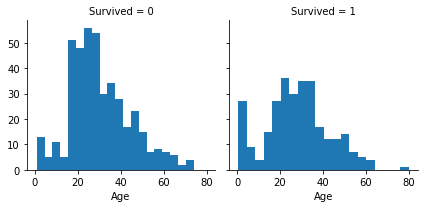

In [13]:
histogram_age = sns.FacetGrid(train_df, col='Survived')
histogram_age.map(plt.pyplot.hist, 'Age', bins=20)
#Survived = 0: Did not survive
#Survived = 1: Did survive

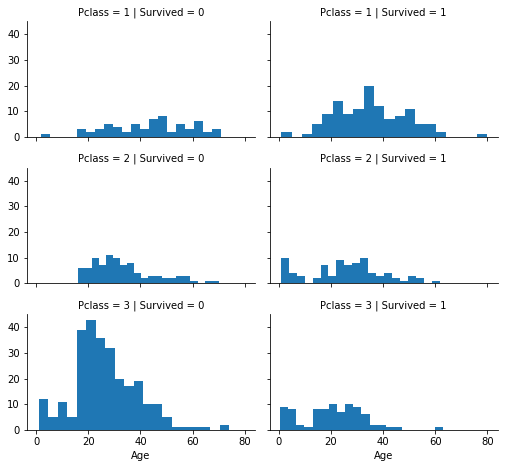

In [14]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.pyplot.hist, 'Age', alpha=1, bins=20)
grid.add_legend();

F:\IT\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
F:\IT\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


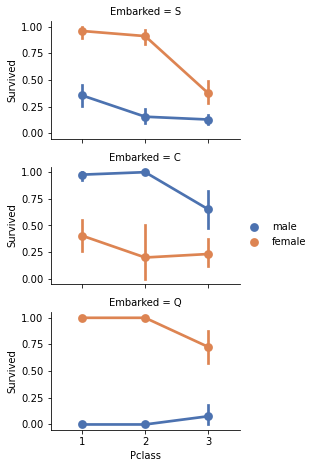

In [15]:
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass','Survived','Sex', palette='deep')
grid.add_legend();

F:\IT\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


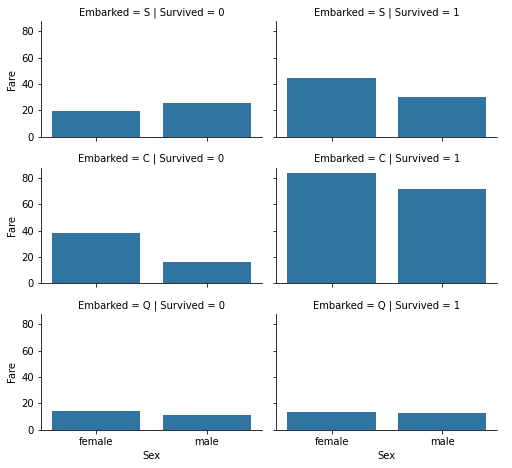

In [16]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=1, ci=None)
grid.add_legend();
#Embarked 'S' observations is 72% (644 / 889) of total.

### Wrangling *Name* Feature

In [17]:
#Removing useless variables
train_df=train_df.drop(['Ticket','Cabin'], axis=1)
test_df=test_df.drop(['Ticket','Cabin'], axis=1)
combine = [train_df, test_df]

In [18]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [19]:
for dataset in combine:
    dataset['Title']=dataset['Title'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Rev','Sir'],'Rare')
    
    dataset['Title']=dataset['Title'].replace(['Mlle','Ms'],'Miss')
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')
    
train_df[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [20]:
#Converting the categorical titles into ordinal ones.
title_mapping = {'Mr': 1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [21]:
train_df = train_df.drop(['PassengerId','Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

### Wrangling *Sex* Feature

In [22]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

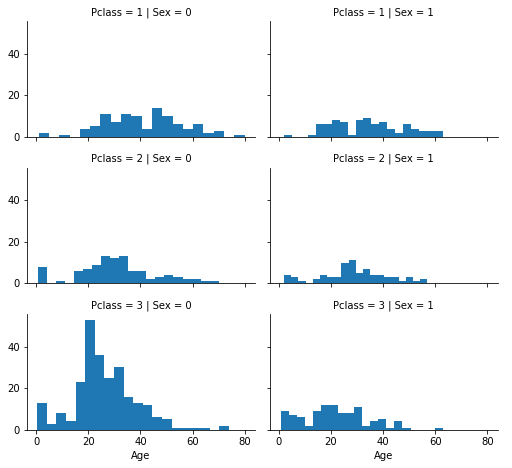

In [23]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.pyplot.hist, 'Age', alpha=1, bins=20)
grid.add_legend()
#REMINDER 0 = female | male =  1

### Wrangling *Age* Feature

In [24]:
#Creating an array to house the age values.
guess_age = np.zeros((2,3))

for dataset in combine:
    for i in range(0,2):
        for ii in range(0,3):
            guess_df = dataset[(dataset['Sex']==i) & (dataset['Pclass'] == ii+1)]['Age'].dropna()
            age_guess = np.median(guess_age)
            guess_age[i,ii] = int(age_guess/0.5+0.5)*0.5

    for i in range(0, 2):
        for ii in range(0,3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == ii + 1), 'Age'] = guess_age[i,ii]
        
    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [25]:
train_df['AgeGroup'] = pd.cut(train_df['Age'], 5)
train_df[['AgeGroup', 'Survived']].groupby(['AgeGroup'], as_index=False).mean().sort_values(by='AgeGroup', ascending = True)

,AgeGroup,Survived
0,"(-0.08, 16.0]",0.386282
1,"(16.0, 32.0]",0.370690
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [26]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[ (dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[ (dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[ (dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    # ^ remove '= 4' if error occurs ^

In [27]:
train_df = train_df.drop(['AgeGroup'], axis = 1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### Wrangling *SibSp* and *Parch* Feature

In [28]:
for dataset in combine:
    dataset['Family'] = dataset['SibSp'] + dataset['Parch'] + 1
    
train_df[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by= 'Survived', ascending=False)

,Family,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [29]:
for dataset in combine:
    dataset['Lone'] = 0
    dataset.loc[dataset['Family'] == 1, 'Lone'] = 1
    
train_df[['Lone', 'Survived']].groupby(['Lone'], as_index=False).mean()
#0 = Not Alone | 1 = Alone

,Lone,Survived
0,0,0.505650
1,1,0.303538


In [30]:
train_df = train_df.drop(['Parch', 'SibSp', 'Family'], axis = 1)
test_df = test_df.drop(['Parch', 'SibSp', 'Family'], axis = 1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Lone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [31]:
for dataset in combine:
    dataset['Age * Class'] = dataset.Age * dataset.Pclass
    
train_df.loc[:, ['Age * Class', 'Age', 'Pclass']].head(10)

,Age * Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,0,0,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### Wrangling *Embarked* Feature

In [32]:
#fill in the missing observations with the most common occurance
mode_port = train_df.Embarked.dropna().mode()[0]

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(mode_port)
    
train_df[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [33]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'C': 0, 'Q': 1, 'S': 2}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Lone,Age * Class
0,0,3,0,1,7.2500,2,1,0,3
1,1,1,1,2,71.2833,0,3,0,2
2,1,3,1,1,7.9250,2,2,1,3
3,1,1,1,2,53.1000,2,3,0,2
4,0,3,0,2,8.0500,2,1,1,6


### Wrangling *Fare* Feature

In [34]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

train_df['FareGroup'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareGroup', 'Survived']].groupby(['FareGroup'], as_index=False).mean().sort_values(by='FareGroup', ascending=True)

,FareGroup,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [35]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[ (dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.45), 'Fare'] = 1
    dataset.loc[ (dataset['Fare'] > 14.45) & (dataset['Fare'] <= 31.0), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train_df = train_df.drop(['FareGroup'], axis=1)
combine = [train_df, test_df]

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Lone,Age * Class
0,0,3,0,1,0,2,1,0,3
1,1,1,1,2,3,0,3,0,2
2,1,3,1,1,1,2,2,1,3
3,1,1,1,2,3,2,3,0,2
4,0,3,0,2,1,2,1,1,6
5,0,3,0,0,1,1,1,1,0
6,0,1,0,3,3,2,1,1,3
7,0,3,0,0,2,2,4,0,0
8,1,3,1,1,1,2,3,0,3
9,1,2,1,0,2,0,3,0,0


## Prediction
* Logistic Regression
* KNN
* Naive Bayes
* Decision Tree
* Random Forest
* Support Vector Machine
* Linear Support Vector Machine
* Perceptron
* Stochastic Gradian Descent

In [36]:
X_train = train_df.drop('Survived', axis = 1)
Y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis = 1).copy()

#### Logistical Regression
* Useful to run early in the workflow
* Using logistics function to meassure relationship between a categorical dependent variable and one or more independent variable

In [37]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train)*100, 2)
acc_log

79.12

In [38]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201214
5,Title,0.428796
6,Lone,0.081081
7,Age * Class,-0.068187
3,Fare,-0.090232
2,Age,-0.183972
4,Embarked,-0.245721
0,Pclass,-1.038611


#### KNN or k-Nearest Neighbor
* Sample is classified by a majority vote of its neighbors, and is assigned to the class that it closest resembles*

In [40]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train)*100, 2)
acc_knn

83.05

#### Naive Bayes
* An extension of Naive Bayes called Gaussian Naive Bayes is being used. Gaussian is easier to use because only the mean and standard deviation is needed.
* Added note, Naive Bayes is called naive because the algorithm assumes that each point of data is independent.

In [41]:
gaunb = GaussianNB()
gaunb.fit(X_train, Y_train)
Y_pred = gaunb.predict(X_test)
acc_gaunb = round(gaunb.score(X_train, Y_train)*100, 2)
acc_gaunb

76.54

#### Decision Tree
* ...

In [42]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
Y_pred = dtree.predict(X_test)
acc_dtree = round(dtree.score(X_train, Y_train)*100 , 2)
acc_dtree

87.43

#### Random Forest
* A collection of Decision Trees
* In my opinion, quite a good classifer but can take some computational time.

In [57]:
rforest = RandomForestClassifier(n_estimators=100)
rforest.fit(X_train, Y_train)
Y_pred = rforest.predict(X_test)
rforest.score(X_train, Y_train)
acc_rforest = round(rforest.score(X_train, Y_train)*100, 2)
acc_rforest

87.43

#### Support Vector Machines (SVM)
* ...

In [45]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train)*100, 2)
acc_svc

83.16

#### Linear Support Vector Classifcation (Linear SVC)
* ...

In [47]:
lsvc = LinearSVC()
lsvc.fit(X_train, Y_train)
Y_pred = lsvc.predict(X_test)
acc_lsvc = round(lsvc.score(X_train, Y_train)*100, 2)
acc_lsvc

F:\IT\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


78.34

#### Perceptron
* ...

In [48]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train)*100, 2)
acc_perceptron

61.95

#### Stochastic Gradient Descent
* ...

In [49]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train)*100, 2)
acc_sgd

75.08

In [50]:
predict_model = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest',
              'Support Vector Machine', 'Linear SVM', 'Perceptron', 'Stochastic Gradian Descent'],
    'Score': [acc_log, acc_knn, acc_gaunb, acc_dtree, acc_rforest, acc_svc, acc_lsvc, acc_perceptron, acc_sgd]})

predict_model.sort_values(by='Score', ascending=False)

,Model,Score
3,Decision Tree,87.43
4,Random Forest,87.43
5,Support Vector Machine,83.16
1,KNN,83.05
0,Logistic Regression,79.12
6,Linear SVM,78.34
2,Naive Bayes,76.54
8,Stochastic Gradian Descent,75.08
7,Perceptron,61.95


#### Creating Submission File

In [59]:
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred    
})

# submission.to_csv('submission.csv', index=False)